Observations and Insights

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Checking the number of mice.
study_df["Mouse ID"].value_counts()

g989    13
o287    10
j119    10
y478    10
k483    10
        ..
h428     1
v199     1
n482     1
u153     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
study_df["Mouse ID"].count()

1893

In [5]:
#study_df.dtypes

In [6]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df[study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].value_counts()

#Is this saying that mouse g989 has duplicated ID across all rows within the data? 

g989    5
Name: Mouse ID, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.loc[:, "Mouse ID"].unique()

array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_df.loc[study_df['Mouse ID'] != 'g989']
#duplicate_mice.loc[duplicate_mice['Mouse ID'] != 'g989'] #removes ALL data
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.loc[:, 'Drug Regimen'].unique()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_DR = clean_df.groupby(['Drug Regimen']) #.apply(list).reset_index()
# mean, median, variance, standard deviation, and SEM of the tumor volume

mean_numpy = grouped_DR['Tumor Volume (mm3)'].mean()
median_numpy = grouped_DR['Tumor Volume (mm3)'].median()
var_numpy = grouped_DR['Tumor Volume (mm3)'].var()
std_numpy = grouped_DR['Tumor Volume (mm3)'].std()
sem_numpy = grouped_DR['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
data1 = {
    'Mean': mean_numpy,
    'Median': median_numpy,
    'Variance': var_numpy,
    'Stdv': std_numpy,
    'SEM': sem_numpy
}

summary1 = pd.DataFrame(data1)
summary1

format_dict = {'Mean':'{0:,.3f}', 'Median': '{:,.3f}', 'Variance': '{:,.3f}', 'Stdv': '{:,.3f}', 'SEM': '{:,.3f}'}
summary1.style.format(format_dict)


,Mean,Median,Variance,Stdv,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [11]:
#Using the aggregation method, produce the same summary statistics in a single line
grouped_DR = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([np.mean, np.median, np.var, np.std, 'sem'])
grouped_DR

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

<IPython.core.display.Javascript object>


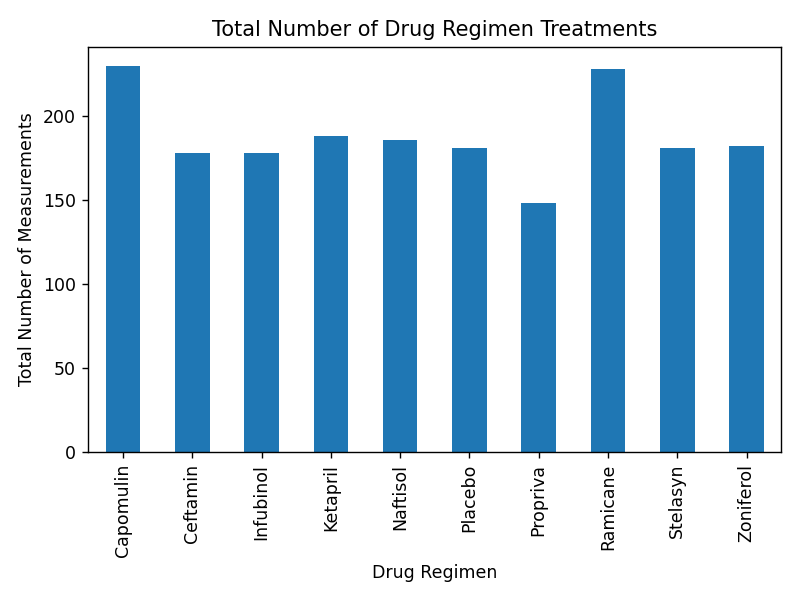

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Create a grouped based on the values in 'Drug Regimen'
grouped_DR = clean_df.groupby('Drug Regimen')

#Find the count
count_DR = grouped_DR['Drug Regimen'].count()
count_DR

#Create a bar chart based off of the the group series from count_DR
panda_chart = count_DR.plot(kind='bar')
panda_chart.set_xlabel("Drug Regimen")
panda_chart.set_ylabel("Total Number of Measurements")
plt.title("Total Number of Drug Regimen Treatments")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


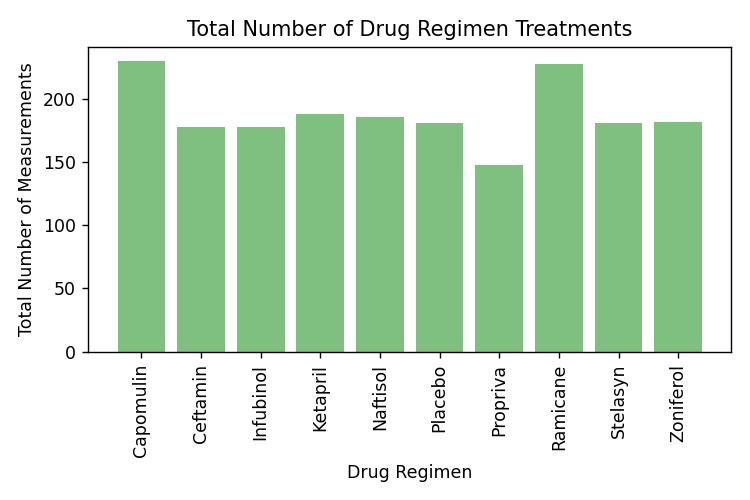

In [58]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Create a grouped based on the values in 'Drug Regimen'
DR_group = clean_df.groupby('Drug Regimen')

#Find the count as the y-axis and set the x-axis range by lenghth of total count of the column 'Drug Regimen'
total_DR = DR_group['Drug Regimen'].count()
x_axis = np.arange(len(total_DR))

#Generate a bar plot using Pyplot
plt.figure(figsize=(6,4))
plt.bar(x_axis, total_DR, color='g', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
# Set a Title and labels
plt.title("Total Number of Drug Regimen Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


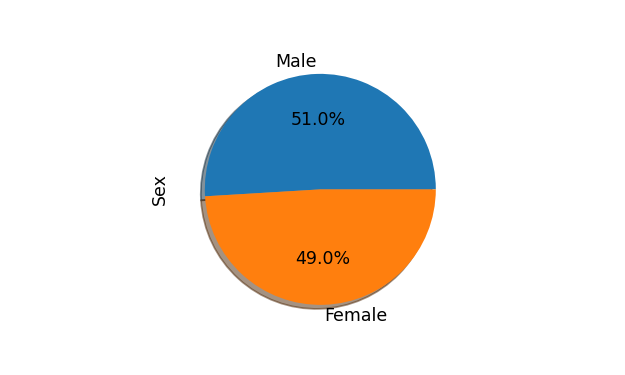

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Find the count
count_gen = clean_df['Sex'].value_counts()
count_gen

panda_chartpie=count_gen.plot(kind='pie', subplots=True, shadow=True, figsize=(5,3), autopct='%1.1f%%')


<IPython.core.display.Javascript object>


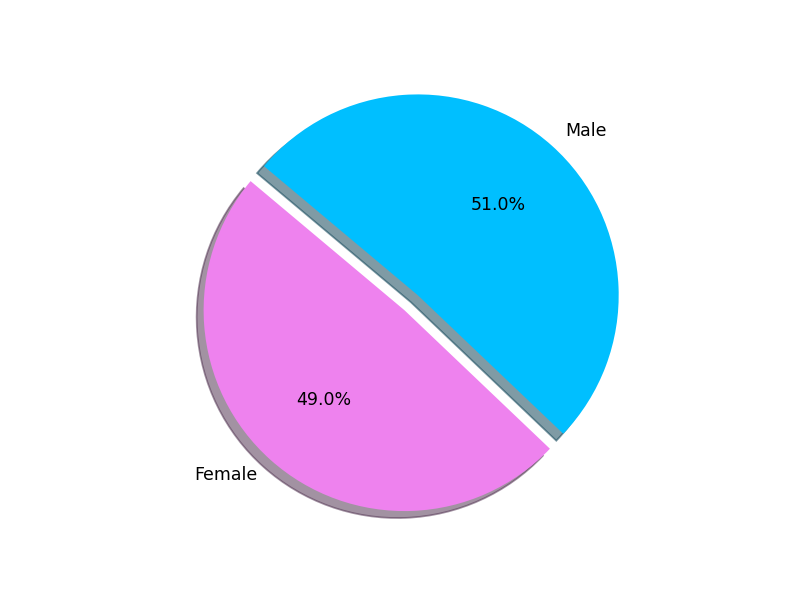

(-1.120369227624225, 1.175585366932385, -1.1141751814166228, 1.186125474151121)

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Find the count
count_gen = clean_df['Sex'].value_counts()
count_gen

#Isolate total count for female vs males in single variable
count_m = clean_df.loc[clean_df['Sex'] == "Male"]
#print(len(count_m.value_counts()))
count_f = clean_df.loc[clean_df['Sex'] == "Female"]
#print(len(count_f.value_counts()))

#Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = [49, 51]
# The colors of each section of the pie chart
colors = ["violet", "deepskyblue"]
# Tells matplotlib to seperate the "Male" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

Quartiles, Outliers, and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
